# Các quán được đánh giá tốt thường tập trung ở quận nào?

# THƯ VIỆN

In [20]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

# DỮ LIỆU

In [52]:
df = pd.read_csv('data/store_info.csv')[['district', 'average_score', 'quality_score', 'serve_score', 'price_score', 'space_score', 'position_score']]
df.head()

,district,average_score,quality_score,serve_score,price_score,space_score,position_score
0,Quận Gò Vấp,7.5,7.7,7.7,7.5,7.3,7.4
1,Quận Gò Vấp,6.5,6.9,6.1,7.1,5.9,6.6
2,Quận Gò Vấp,4.4,3.3,4.7,4.7,4.7,4.7
3,Quận Gò Vấp,7.6,8.0,6.8,7.9,7.6,7.8
4,Quận Gò Vấp,9.4,9.4,9.6,9.4,9.3,9.3


In [53]:
df0 = df.copy()

# PHÂN TÍCH

## Tìm giá trị trung bình mỗi loại điểm đánh giá của mỗi khu vực

In [54]:
df0 = df0.groupby(by='district').mean().round(4)
df0.head()

,average_score,quality_score,serve_score,price_score,space_score,position_score
district,,,,,,
Huyện Bình Chánh,7.4511,7.6750,7.3683,7.4904,7.3394,7.2538
Huyện Cần Giờ,7.2043,7.6478,7.1739,7.4913,6.8826,6.8348
Huyện Củ Chi,7.5604,7.7484,7.4692,7.5242,7.5923,7.4769
Huyện Hóc Môn,7.7158,7.9801,7.6370,7.8932,7.5180,7.4113
Huyện Nhà Bè,7.6068,7.8115,7.6545,7.8482,7.4136,7.3089


In [55]:
df1 = df0.copy()

## Tìm thứ hạng của mỗi điểm đánh giá của từng khu vực

In [56]:
for i in df1.columns:
    if i != 'district': 
        name = 'rank of {}'.format(i)
        df1[name] = ss.rankdata(df1[i])

df1['mean of ranks'] = (df1['rank of average_score'] 
                       + df1['rank of price_score'] 
                       + df1['rank of serve_score'] 
                       + df1['rank of quality_score'] 
                       + df1['rank of space_score'] 
                       + df1['rank of position_score'])/6

df1.head()

,average_score,quality_score,serve_score,price_score,space_score,position_score,rank of average_score,rank of quality_score,rank of serve_score,rank of price_score,rank of space_score,rank of position_score,mean of ranks
district,,,,,,,,,,,,,
Huyện Bình Chánh,7.4511,7.6750,7.3683,7.4904,7.3394,7.2538,17.0,20.0,15.0,12.0,20.0,5.0,14.833333
Huyện Cần Giờ,7.2043,7.6478,7.1739,7.4913,6.8826,6.8348,1.0,17.0,2.0,13.0,5.0,1.0,6.500000
Huyện Củ Chi,7.5604,7.7484,7.4692,7.5242,7.5923,7.4769,21.0,21.0,21.0,17.0,23.0,21.0,20.666667
Huyện Hóc Môn,7.7158,7.9801,7.6370,7.8932,7.5180,7.4113,24.0,24.0,23.0,24.0,22.0,19.0,22.666667
Huyện Nhà Bè,7.6068,7.8115,7.6545,7.8482,7.4136,7.3089,22.0,23.0,24.0,23.0,21.0,11.0,20.666667


In [71]:
df2 = df1.copy()

## Loại bỏ những quận không quan tâm đến

In [72]:
dis = ["Huyện Hóc Môn","Huyện Nhà Bè","Huyện Củ Chi","Huyện Bình Chánh","Quận 9","Huyện Cần Giờ"]
#dis = []
df2 = df2.drop(labels=dis, axis=0)

In [73]:
df3 = df2.reset_index().copy()

## Trực quan hóa trung bình thứ hạng của mỗi quận

<AxesSubplot:xlabel='district', ylabel='mean of ranks'>

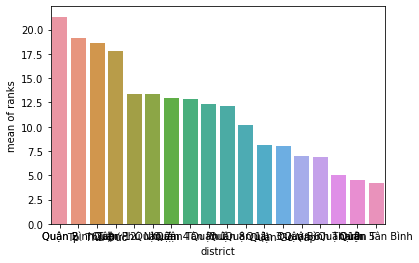

In [74]:
sns.barplot(data=df3, x='district', y='mean of ranks', order=df3.sort_values('mean of ranks', ascending=False)['district'])

In [77]:
df4 = df3.sort_values('mean of ranks', ascending=False)[['district','mean of ranks']].reset_index(drop=True)
df4['mean of ranks'] = df4['mean of ranks'].round(2)
df4

,district,mean of ranks
0,Quận 2,21.33
1,Quận Bình Tân,19.17
2,Tp. Thủ Đức,18.67
3,Quận 12,17.83
4,Quận Phú Nhuận,13.33
5,Quận 7,13.33
6,Quận 4,13.00
7,Quận Tân Phú,12.83
8,Quận 1,12.33
9,Quận 8,12.17


- Nhận xét: 
    + Xem trong Workbook Tableau: https://public.tableau.com/app/profile/nguyen.thai7140/viz/UDPTDLTM/Storynhgicaccqunntngkhuvc?publish=yes